In [1]:
from notebook_tools import *
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from pylab import *
majorLocator   = MultipleLocator(0.01)
%matplotlib inline

In [45]:
contact = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/calculations/eepp_eep_ratio/contact12C.csv')

In [2]:
correction_df = pd.read_csv('/Users/erezcohen/Desktop/ForAxel/CorrectionDataFrame.csv')

In [3]:
correction_df

,Unnamed: 0,correction,correction_err,pmiss_analysis_bins_center
0,0,2.772851,1.093577,0.3375
1,1,2.320634,0.798661,0.4125
2,2,2.062530,0.675091,0.4750
3,3,1.940160,0.610965,0.5250
4,4,1.887549,0.568795,0.5750
5,5,1.840847,0.527453,0.6250
6,6,1.810609,0.496186,0.6750
7,7,1.787281,0.472320,0.7250
8,8,1.844194,0.459501,0.8125
9,9,3.052384,0.738782,0.9375


In [41]:
ran_eepp_eep = dict({'min_p':0.35,'max_p':0.6,'ratio extrapolated':9.56,'ratio extrapolated err':2.43,'ratio halfed':4.78,'ratio halfed err':1.21})
print 'ran_eepp_eep:\n',ran_eepp_eep
Tp = dict({'C12':0.53,'Al27':0.43,'Fe56':0.34,'Pb208':0.22,'C12err':0.05,'Al27err':0.05,'Fe56err':0.04,'Pb208err':0.03})
Tpp = dict({'C12':0.44,'Al27':0.35,'Fe56':0.26,'Pb208':0.16,'C12err':0.04,'Al27err':0.04,'Fe56err':0.03,'Pb208err':0.02})
Pscx = dict({'C12':0.02,'Al27':0.03,'Fe56':0.04,'Pb208':0.07,'C12err':0.02,'Al27err':0.03,'Fe56err':0.04,'Pb208err':0.06})
print 'transparency\nTp:',Tp,'\nTpp:',Tpp,'\nPscx:',Pscx
sigmap2sigman = 2.5
print 'sigmap2sigman:',sigmap2sigman

ran_eepp_eep:
{'max_p': 0.6, 'ratio extrapolated': 9.56, 'ratio extrapolated err': 2.43, 'min_p': 0.35, 'ratio halfed err': 1.21, 'ratio halfed': 4.78}
transparency
Tp: {'Fe56': 0.34, 'Pb208': 0.22, 'C12err': 0.05, 'Al27': 0.43, 'Fe56err': 0.04, 'Pb208err': 0.03, 'C12': 0.53, 'Al27err': 0.05} 
Tpp: {'Fe56': 0.26, 'Pb208': 0.16, 'C12err': 0.04, 'Al27': 0.35, 'Fe56err': 0.03, 'Pb208err': 0.02, 'C12': 0.44, 'Al27err': 0.04} 
Pscx: {'Fe56': 0.04, 'Pb208': 0.07, 'C12err': 0.02, 'Al27': 0.03, 'Fe56err': 0.04, 'Pb208err': 0.06, 'C12': 0.02, 'Al27err': 0.03}
sigmap2sigman: 2.5


In [42]:
PmissBins = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
pmiss_analysis_bins , pmiss_analysis_bins_center , pmiss_multiples_bins , pmiss_bin_center = [] , [] , [] , []
for i in range(len(PmissBins)):
    pmin , pmax = PmissBins[i][0] , PmissBins[i][1]
    for j in range(4):
        pmiss_multiples_bins.append( [ pmin + float(j*(pmax-pmin))/4 , pmin + float((j+1)*(pmax-pmin))/4 ])
    for j in range(2):
        pmiss_analysis_bins.append( [ pmin + float(j*(pmax-pmin))/2 , pmin + float((j+1)*(pmax-pmin))/2 ])

print 'pmiss_multiples_bins:',pmiss_multiples_bins
print 'pmiss_analysis_bins:',pmiss_analysis_bins


for i in range( len(pmiss_multiples_bins) ):
    pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
    pmiss_bin_center.append(0.5*(pmin+pmax))
print 'pmiss_bin_center:',pmiss_bin_center


for i in range( len(pmiss_analysis_bins) ):
    pmin , pmax = pmiss_analysis_bins[i][0] , pmiss_analysis_bins[i][1]
    pmiss_analysis_bins_center.append(0.5*(pmin+pmax))
print 'pmiss_analysis_bins_center:',pmiss_analysis_bins_center



pmiss_multiples_bins: [[0.3, 0.3375], [0.3375, 0.375], [0.375, 0.4125], [0.4125, 0.45], [0.45, 0.47500000000000003], [0.47500000000000003, 0.5], [0.5, 0.525], [0.525, 0.55], [0.55, 0.5750000000000001], [0.5750000000000001, 0.6000000000000001], [0.6000000000000001, 0.625], [0.625, 0.65], [0.65, 0.675], [0.675, 0.7], [0.7, 0.725], [0.725, 0.75], [0.75, 0.8125], [0.8125, 0.875], [0.875, 0.9375], [0.9375, 1.0]]
pmiss_analysis_bins: [[0.3, 0.375], [0.375, 0.45], [0.45, 0.5], [0.5, 0.55], [0.55, 0.6000000000000001], [0.6000000000000001, 0.65], [0.65, 0.7], [0.7, 0.75], [0.75, 0.875], [0.875, 1.0]]
pmiss_bin_center: [0.31875, 0.35625, 0.39375, 0.43125, 0.4625, 0.48750000000000004, 0.5125, 0.5375000000000001, 0.5625, 0.5875000000000001, 0.6125, 0.6375, 0.6625000000000001, 0.6875, 0.7124999999999999, 0.7375, 0.78125, 0.84375, 0.90625, 0.96875]
pmiss_analysis_bins_center: [0.3375, 0.4125, 0.475, 0.525, 0.5750000000000001, 0.625, 0.675, 0.725, 0.8125, 0.9375]


In [46]:
def plot_eepp_eep_ratio(target = 'C12', name = '$^{12}$C', A=12, Z=6,
                        correction=None, correction_err=None , pmiss_analysis_bins=None, pmiss_bin_center=None,
                        do_add_contactcurve=False,                                               
                        do_add_uncorrected_data=True,                                               
                        do_add_horizontal_scalar_line=True,
                        do_print = False,
                        do_save_plots=True):
    
    eep = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_ppSRCCut_DATA_%s.root'%target , 'anaTree')
    eepp = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_DATA_%s.root'%target , 'anaTree')

    pmiss_bin_width  , eep_in_bin , eepp_in_bin , ratio , ratio_err = [] , [] , [] , [] , []
    for i in range( len(pmiss_analysis_bins) ):
        pmin , pmax = pmiss_analysis_bins[i][0] , pmiss_analysis_bins[i][1]
        pmiss_bin_width.append( 0.5*(pmax - pmin) )
        eep_in_bin.append( eep.GetEntries(ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))) )
        eepp_in_bin.append( eepp.GetEntries(ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))) )
        ratio.append(100*float(eepp_in_bin[-1])/eep_in_bin[-1])
        ratio_err.append(ratio[-1] * np.sqrt(1./eepp_in_bin[-1] + 1./eep_in_bin[-1]))
    

    eep.Close()
    eepp.Close()
    
    if do_print:
        print len(pmiss_multiples_bins),len(pmiss_bin_center),len(ratio),len(pmiss_bin_width)
    
    if do_add_uncorrected_data and do_save_plots:
        fig,ax = plt.subplots(figsize=(15,10))
        plt.errorbar(pmiss_bin_center,ratio,
                     xerr=pmiss_bin_width,yerr=ratio_err,fmt='ro', color='black',markersize=20)
        set_axes(ax , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
        ax.grid()
        ax.set_ylim(0,21)
        ax.set_xlim(0.25,1.01)
        fig.savefig('/Users/erezcohen/Desktop/DataMining/AccCorr_ppSRCAnalysisNote/all_figures/eepp_eep_NotCorrectedForAcceptance_%s.pdf'%target)
    
    Tp_Tpp_ratio ,Tp_Tpp_err = Tp[target]/Tpp[target] , Tp[target]/Tpp[target] * sqrt( np.square(Tp[target+'err']/Tp[target])+np.square(Tpp[target+'err']/Tpp[target]) )
    Tpp_Tp_ratio ,Tpp_Tp_err = Tpp[target]/Tp[target] , Tpp[target]/Tp[target] * sqrt( np.square(Tp[target+'err']/Tp[target])+np.square(Tpp[target+'err']/Tpp[target]) )

    ratio_corrected , ratio_corrected_err = [] , [] 
    np2pp_ratio , np2pp_ratio_err = [] , []

    for i in range( len(ratio) ):
        ratio_corrected.append(ratio[i] * correction[i])
        ratio_corrected_err.append( ratio_corrected[-1] * np.sqrt( np.square(ratio_err[i]/ratio[i]) + np.square(correction_err[i]/correction[i]) ))

        R = ratio_corrected[-1]/100.
        R_err = ratio_corrected_err[-1]/100.

        numer = Tpp_Tp_ratio - R
        numer_err = np.sqrt( np.square(Tpp_Tp_err) + np.square(R_err) )
        denom = R - Pscx[target]*Tpp_Tp_ratio/sigmap2sigman 
        denom_err = np.sqrt( np.square(R_err) 
                            + np.square(Pscx[target]*Tpp_Tp_ratio/sigmap2sigman)
                            * np.square(Pscx[target+'err']/Pscx[target]) + np.square(Tpp_Tp_err/Tpp_Tp_ratio)
                           )
        np2pp_ratio.append(2* numer / denom )

        np2pp_ratio_err.append( 0.01*np2pp_ratio[-1] *
                               (np.square(numer_err/(Tpp_Tp_ratio - 0.01*ratio_corrected[-1])) 
                               + np.square(denom_err/(0.01*ratio_corrected[-1] - Pscx[target]*(Tpp_Tp_ratio)/(sigmap2sigman) )) ) )

    if do_save_plots:     
        fig2,ax2 = plt.subplots(figsize=(15,10))
        plt.errorbar(pmiss_bin_center,ratio_corrected,xerr=pmiss_bin_width,yerr=ratio_corrected_err,
                     fmt='ro', color='black',label='This Work',markersize=20)
        set_axes(ax2 , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
        ax2.grid()
        ax2.set_xlim(0.296,1.01)
    
        if target=='C12': 
            # add Ran' ratio
            plt.errorbar(x=[0.5*(ran_eepp_eep['min_p']+ran_eepp_eep['max_p'])],y=[ran_eepp_eep['ratio extrapolated']],
                     xerr=[0.5*(ran_eepp_eep['max_p']-ran_eepp_eep['min_p'])],yerr=[ran_eepp_eep['ratio extrapolated err']],
                     markersize=20, fmt='s', linewidth=4,label='Hall-A',markerfacecolor='none',ecolor='blue')
            plt.scatter(x=[0.5*(ran_eepp_eep['min_p']+ran_eepp_eep['max_p'])],
                        y=[ran_eepp_eep['ratio extrapolated']], 
                        s=500, marker='s', edgecolor='blue', linewidth='3', facecolor='none', hatch='')

            # add the contact curve
            if do_add_contactcurve:
                x = contact['k[GeV/c]']
                numer = 100*Tpp_Tp_ratio*(sigmap2sigman*contact['n_pp'] + Pscx[target]*contact['n_pn'])
                numer_err = numer*np.sqrt( np.square(Tpp_Tp_err/Tpp_Tp_ratio) 
                                          + np.square( np.sqrt(np.square(sigmap2sigman*contact['n_pp_err']) 
                                                               + np.square(Pscx[target]*contact['n_pn'])*(np.square(Pscx[target+'err']/Pscx[target])+np.square(contact['n_pn_err']/contact['n_pn']))) 
                                                      /(sigmap2sigman*contact['n_pp'] + Pscx[target]*contact['n_pn'])) )
                denom = sigmap2sigman*(contact['n_pp']+contact['n_pn'])
                denom_err = sigmap2sigman*np.sqrt(np.square(contact['n_pp_err'])+np.square(contact['n_p_err']))

                y = numer/denom
                y_err = y * np.sqrt( np.square(numer_err/numer) + np.square(denom_err/denom) )
                plt.plot(x,y,color='purple',label='VMC+Contact')
                plt.fill_between(x,y-y_err,y+y_err,color='purple',alpha=0.2)
                y = 100*Tpp_Tp_ratio*contact['n_pp']/(contact['n_pp']+contact['n_pn'])

            # add full scalar dominance line 
        if do_add_horizontal_scalar_line:
            x = contact['k[GeV/c]']
            numer = 100*Tpp_Tp_ratio*(sigmap2sigman + Pscx[target]*4)
            denom = sigmap2sigman*(1+4)
            y = (x/x)*numer/denom
            plt.plot(x,y,'--',linewidth=3,label='Scalar Dominance')
            
        ax2.set_ylim(0.,50)
        plt.legend(loc='best',fontsize=25)
        fig2.savefig('/Users/erezcohen/Desktop/DataMining/AccCorr_ppSRCAnalysisNote/all_figures/eepp_eep_CorrectedForAcceptance_%s.pdf'%target)

    return pmiss_bin_center , pmiss_bin_width , ratio_corrected , ratio_corrected_err

20 10 10 10


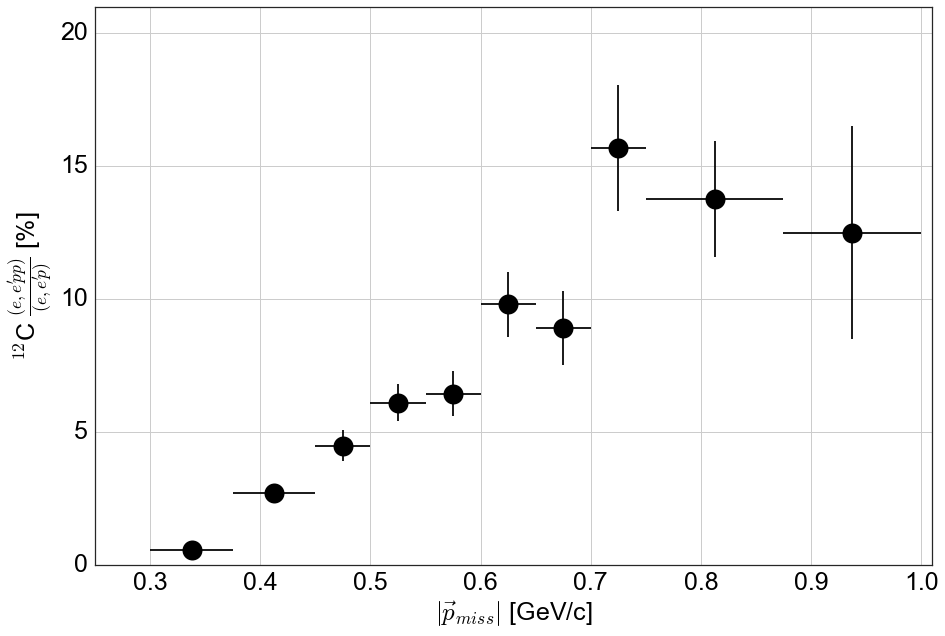

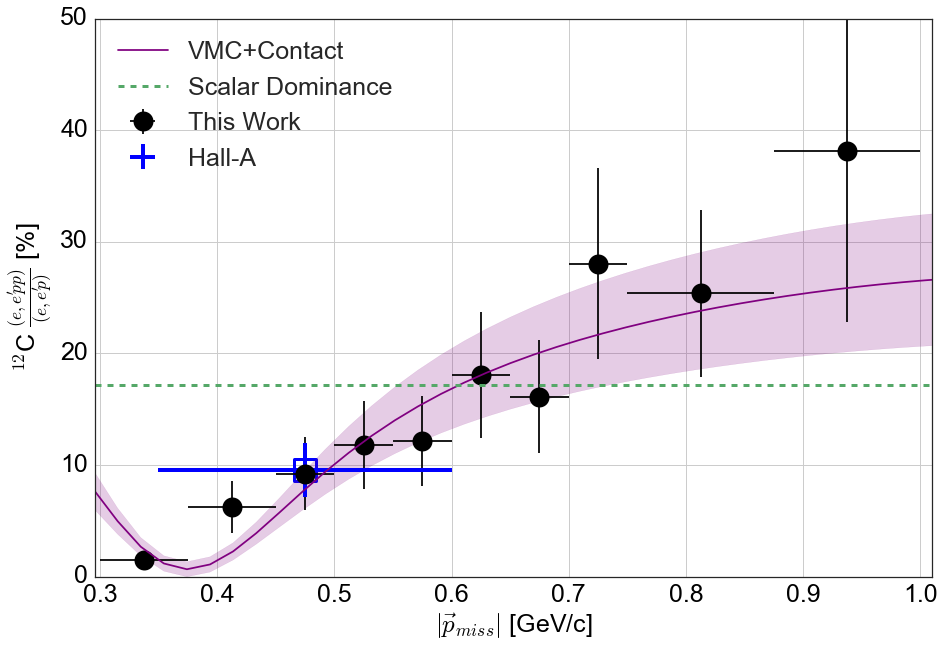

In [47]:
plot_eepp_eep_ratio(target='C12', name='$^{12}$C', 
                    correction=correction_df.correction ,
                    correction_err=correction_df.correction_err,
                    pmiss_analysis_bins=pmiss_analysis_bins,
                    pmiss_bin_center=correction_df.pmiss_analysis_bins_center,    
                    do_save_plots=True,
                    do_add_contactcurve=True,
                    do_add_horizontal_scalar_line=True,
                    do_print=True);